# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Student Name: Shreeya Behera
- name.#: behera.18


***
# Introduction

This homework will focus on a modified version of the kaggle dataset "Pima Indians Diabetes Database". It can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The overarching objective is to diagnostically predict whether or not a patient has diabetes based upon several other covariates. The full description is shown on the website.

Your task will be to first:
1) Do the prerequisite EDA to understand the data set you will be working on. 

2) Fit an appropriate logistic model and analyze it.

While some of the questions have exact answers, a few others are more open to interpretation. However, what we're looking for is the correct thinking ana analysis. For the objective questions, while some points are awarded for "the correct number", the majority of the points will be awarded for a proper analysis and logical investigation.

Note: The data has been modified in both some subtle and not-so-subtle ways. You're welcome to look at other previous work online (in kaggle, stack overflow, etc -- and in fact that's critical to learning how to write good code!) but be wary about just using other people's work. It would both be a violation of the academic code of conduct, but it may also lead you down the wrong path

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.


### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (10%)
> -	Is it well organized and does the presentation flow in a logical manner?
> -	Are there no grammar and spelling mistakes?
> -	Do the charts/graphs relate to the text?
> -	Are the summarized key points and findings understandable by non-experts?
> -	Do the Overview and Conclusions provide context for the entire exercise?
2.	Domain Understanding Phase (10%)
> -	Did you provide a reasonable level of information?
3.	Data Understanding Phase (30%)
> -	Did you find novel and/or interesting insights, or did you solely focus on simple summarizations of the data?
> -	Did you draw and present potential conclusion or observations from your analysis of the data?
> -	Did the statistics and visualizations you used make sense in the context of the data?
4.	Data Analysis Phase (40%)
> -   Did you correctly do the data cleaning steps and perform the appropriate logistic regression.
> -   Was your analysis of the significant variables appropriate.
> -   How have you justified your feature transformation and/or feature creation steps.
5.  Conclusions (10%)
> -   Did you summarize appropriately your critical findings. 
> -   Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project1_Surname_DotNumber.zip

The submitted file should be less than 10MB.


***

***
# Section 0: Setup
- Add any needed imports, helper functions, etc., here.
***

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

The data came from National Institute of Diabetes and Digestive and Kidney Diseases. The rows represent each individual participants of the survey who are all female and from the Pima Indian community.

The data is collected to accurately predict whether or not the patients in the dataset have diabetes or not.

"The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous
study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate
of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years,
which included an oral glucose tolerance test. Diabetes was diagnosed according to World Health Organization Criteria;
that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian
Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine
medical care [7]. "
"This data set provided a well validated data resource in which to explore prediction of the date of onset of diabetes in a longitudinal manner."
--Credits: Section 2, Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. 




***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
***

***
## Section: 2.1 - Describe the meaning and type of data for each feature.
***

In [49]:
data = pd.read_csv("diabetes_hw_data_3494.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               783 non-null    float64
 1   Glucose                   783 non-null    int64  
 2   BloodPressure             783 non-null    float64
 3   SkinThickness             783 non-null    float64
 4   Insulin                   783 non-null    float64
 5   BMI                       783 non-null    float64
 6   DiabetesPedigreeFunction  783 non-null    float64
 7   Age                       783 non-null    float64
 8   Outcome                   783 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 55.2 KB


##### Describe stuff here #######

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [51]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.841635,121.280971,70.726692,20.968072,82.762452,32.360409,0.470271,34.444444,0.348659
std,3.366824,32.325356,31.374634,18.732339,121.761453,11.463401,0.330093,25.167961,0.476850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.350000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000,1.000000


***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

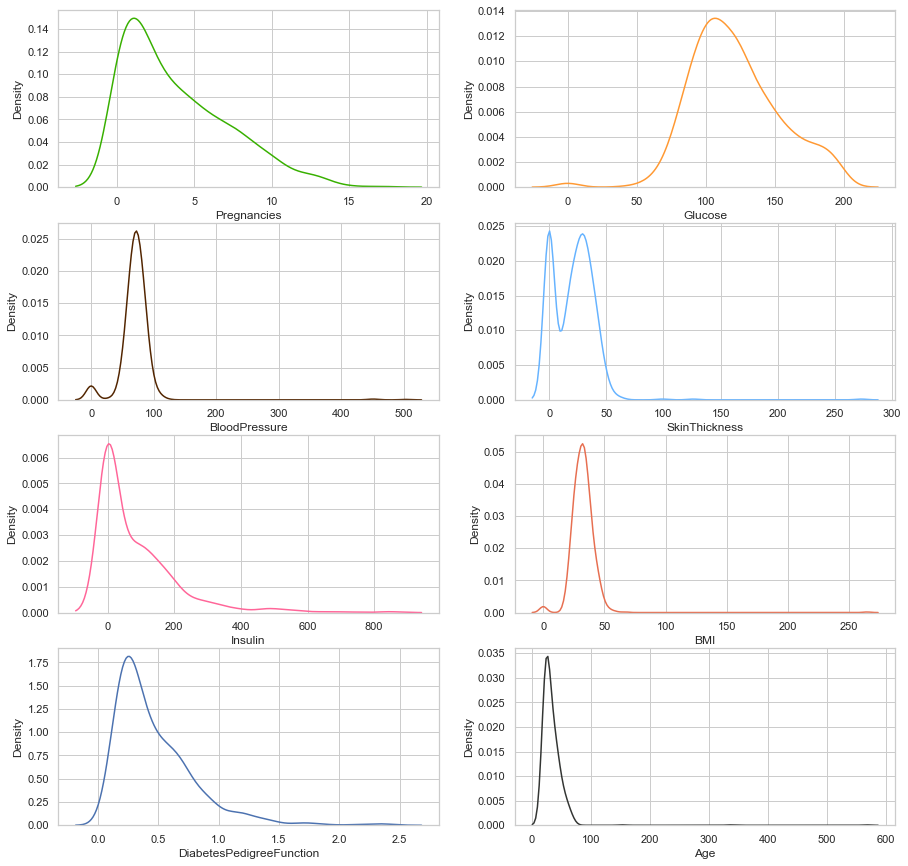

In [52]:
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
sns.kdeplot(data['Pregnancies'],color='#38b000',ax=axs[0])
sns.kdeplot(data['Glucose'],color='#FF9933',ax=axs[1])
sns.kdeplot(data['BloodPressure'],color='#522500',ax=axs[2])
sns.kdeplot(data['SkinThickness'],color='#66b3ff',ax=axs[3])
sns.kdeplot(data['Insulin'],color='#FF6699',ax=axs[4])
sns.kdeplot(data['BMI'],color='#e76f51',ax=axs[5])
sns.kdeplot(data['DiabetesPedigreeFunction'],ax=axs[6])
sns.kdeplot(data['Age'],color='#333533',ax=axs[7])
plt.show()

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

There are no missing values as we can see it from data.info. There are 783 non-null values for each column. But  the features like Glucose, BloodPressure, Insulin, SkinThickness has 0 values which is not possible. We have to replace 0 values with their mean later.

In [53]:
duplicate = data[data.duplicated(keep="first" )]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


In [54]:
len(duplicate)

15

There are 15 duplicates row in total. We want to remove them, so that we don not count the same data more than once. As they will false significance to certain quantities.

In [55]:
#data.drop_duplicates(ignore_index=True, inplace=True,)
#data

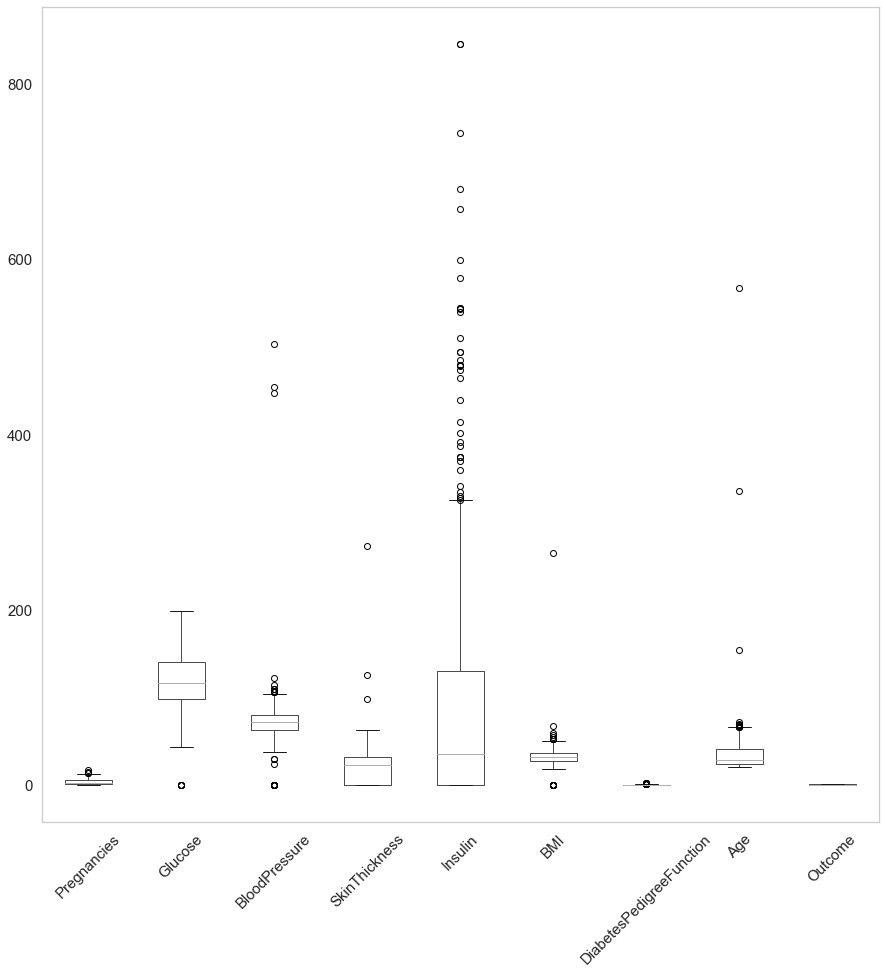

In [56]:
boxplot = data.boxplot(grid=False, rot=45,figsize=(15,15), fontsize=15)   

We see a lot of outliers we can see in the above figure. We need to somehow get rid of it in an efficient way.

***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

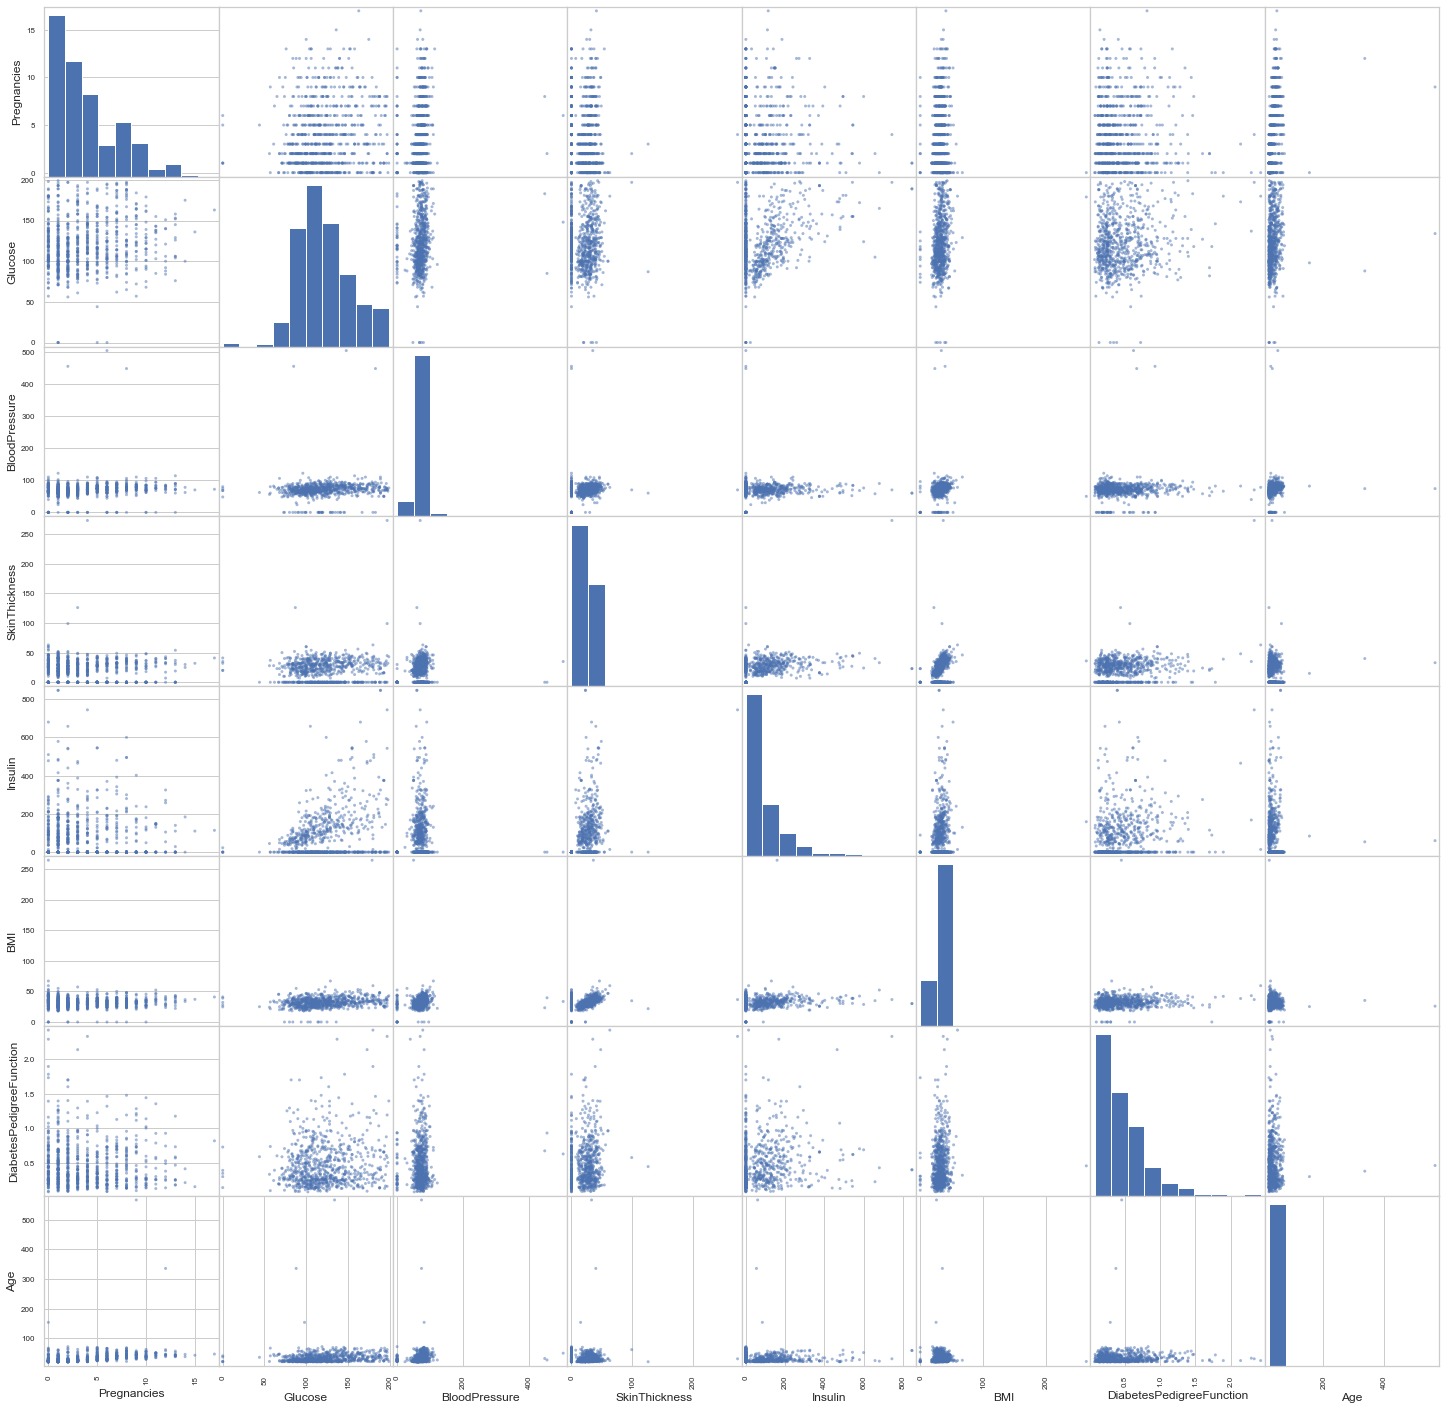

In [57]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data[["Pregnancies","Glucose", "BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction","Age"]],figsize=(25, 25))

In [58]:
data[["Pregnancies","Glucose", "BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction","Age"]].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.132242,0.111254,-0.073844,-0.084473,-0.013870,-0.039626,0.318427
Glucose,0.132242,1.000000,0.115182,0.070279,0.332334,0.194518,0.129911,0.113154
BloodPressure,0.111254,0.115182,1.000000,0.084777,0.011787,0.105670,0.063477,0.082517
SkinThickness,-0.073844,0.070279,0.084777,1.000000,0.443238,0.245583,0.252775,-0.023174
Insulin,-0.084473,0.332334,0.011787,0.443238,1.000000,0.135811,0.172908,-0.023527
BMI,-0.013870,0.194518,0.105670,0.245583,0.135811,1.000000,0.090792,-0.011499
DiabetesPedigreeFunction,-0.039626,0.129911,0.063477,0.252775,0.172908,0.090792,1.000000,0.004050
Age,0.318427,0.113154,0.082517,-0.023174,-0.023527,-0.011499,0.004050,1.000000


We can see that skinthickness and insulin have a high correlation both from the correlation matrix and from the scatter plot, similarly insulin and glucose too.

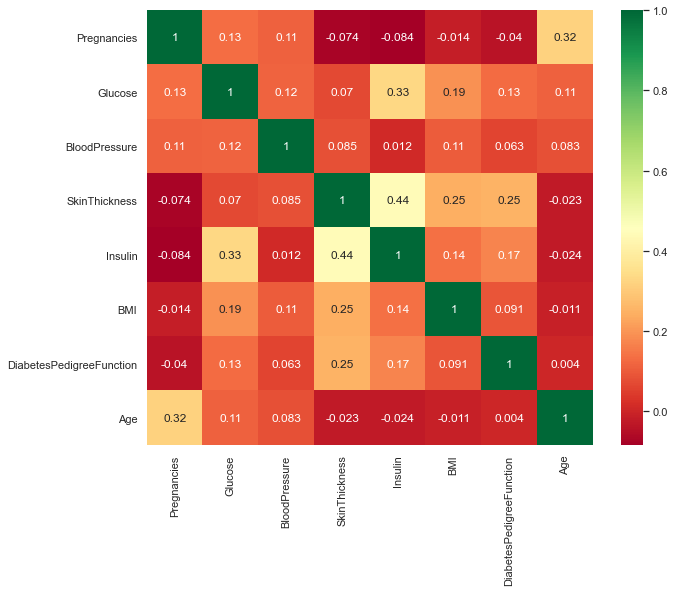

In [59]:
#Correlation matrix
sns.heatmap(data[data.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 
***

Credit for the following code: https://www.marsja.se/how-to-convert-numpy-array-to-pandas-dataframe-examples/

In [60]:

from sklearn.feature_selection import chi2

X = data[["Pregnancies","Glucose", "BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction","Age"]]
y = data[['Outcome']]
chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

pd.DataFrame( chi_scores[1], X.columns, columns=['p-value'])

,p-value
Pregnancies,2.796708e-28
Glucose,0.000000e+00
BloodPressure,1.448620e-14
SkinThickness,8.590641e-06
Insulin,0.000000e+00
BMI,3.844922e-40
DiabetesPedigreeFunction,2.709181e-02
Age,1.029189e-22


As we can see that all the p-values for each feature is less than 0.05, they are dependent with the outcome.

***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How any duplicate records are were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***

We saw earlier there were 15 rows in total which were duplicates. We can see them below too. We will remove these 15 rows in the next line.

In [61]:
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


In [62]:
data.drop_duplicates(ignore_index=True, inplace=True,)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
...,...,...,...,...,...,...,...,...,...
763,1.0,71,48.0,18.0,76.0,20.4,0.323,22.0,0
764,2.0,112,78.0,50.0,140.0,39.4,0.175,24.0,0
765,0.0,138,0.0,0.0,0.0,36.3,0.933,25.0,1
766,4.0,183,0.0,0.0,0.0,28.4,0.212,36.0,1


In [63]:
#Dividing the entire data st into two parts depending on the outcome 0 or 1

dataframe1  = data[data['Outcome']==1]
dataframe0  = data[data['Outcome']==0]


In [64]:
dataframe1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,73.869403,22.164179,100.335821,35.988806,0.550500,37.067164,1.0
std,3.741239,31.939622,41.085297,17.679711,138.689125,15.786042,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,39.000000,0.728000,44.000000,1.0
max,17.000000,199.000000,504.000000,99.000000,846.000000,264.600000,2.420000,70.000000,1.0


In [65]:
dataframe0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.964000,20.348000,70.472000,30.304200,0.429734,33.002000,0.0
std,3.017185,26.1412,25.009952,19.281142,102.924302,7.689855,0.299085,30.313162,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,455.000000,273.000000,744.000000,57.300000,2.329000,567.000000,0.0


Interquartile Range Method:
The IQR is calculated as the difference between the $75$th and the $25$th percentiles of the data and defines the box in a box and whisker plot. 

Then calculate the cutoff for outliers as $1.5$ times the IQR and subtract this cut-off from the $25$th percentile and add it to the $75$th percentile to give the actual limits on the data.

I used the same the remove the outliers from each data set for all features.  



In [66]:
#Source: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
#calculate interquartile range and then the outlier range from each data set 

q25_1 =dataframe1.quantile(0.25) 

q75_1 = dataframe1.quantile(0.75)
iqr_1 = q75_1 - q25_1
cut_off_1 = iqr_1 * 1.5
lower_1, upper_1 = q25_1 - cut_off_1, q75_1 + cut_off_1


q25_0 =dataframe0.quantile(0.25) 

q75_0 = dataframe0.quantile(0.75)
iqr_0 = q75_0 - q25_0
cut_off_0 = iqr_0 * 1.5
lower_0, upper_0 = q25_0 - cut_off_0, q75_0 + cut_off_0


#Finding median for each data group
median1=dataframe1.quantile(0.50)
median0=dataframe0.quantile(0.50)



In [67]:
#Changing the outlier values to median value withing the specific outcome group 
for i in X:
    
    dataframe1[i] = np.where(dataframe1[i] < lower_1[i]  , median1[i], dataframe1[i])
    dataframe1[i] = np.where( dataframe1[i] > upper_1[i] , median1[i], dataframe1[i])
    dataframe0[i]= np.where(dataframe0[i] < lower_0[i]  , median0[i], dataframe0[i])
    dataframe0[i]= np.where(dataframe0[i] > upper_0[i]  , median0[i], dataframe0[i])
dataframe1.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.302239,75.033582,21.895522,76.063433,34.883396,0.524597,36.940299,1.0
std,3.741239,29.488811,10.525997,17.043355,99.357372,5.694057,0.312338,10.780938,0.0
min,0.000000,78.000000,48.000000,0.000000,0.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,69.500000,0.000000,0.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.448000,36.000000,1.0
75%,8.000000,167.000000,82.000000,35.250000,151.250000,38.200000,0.713000,44.000000,1.0
max,17.000000,199.000000,106.000000,63.000000,392.000000,50.000000,1.394000,67.000000,1.0


In [68]:
#Replacing missing values with mean from each data set
Subset = data[["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]]

for i in Subset:
    
    dataframe1[i] = np.where(dataframe1[i] ==0  , dataframe1[i].loc[dataframe1[i] !=0].mean(), dataframe1[i])
    dataframe0[i]= np.where(dataframe0[i] ==0  , dataframe0[i].loc[dataframe0[i] !=0].mean(), dataframe0[i])


dataframe0.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.088000,109.168000,70.622000,27.193906,97.155303,30.746100,0.386902,29.334000,0.0
std,2.718646,22.014292,10.881541,8.499019,39.234014,6.320306,0.213763,8.766078,0.0
min,0.000000,56.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.750000,64.000000,22.000000,82.000000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.000000,70.000000,27.193906,97.155303,30.050000,0.336000,27.000000,0.0
75%,5.000000,123.000000,78.000000,31.000000,97.155303,35.125000,0.516250,33.000000,0.0
max,11.000000,173.000000,100.000000,60.000000,255.000000,47.900000,1.022000,58.000000,0.0


In [69]:
#Combining back both the data group 
data = pd.concat([dataframe0, dataframe1])


In [70]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.708333,120.730469,72.161458,29.080407,123.536181,32.189844,0.434952,31.988281,0.348958
std,3.224876,29.457662,10.955878,8.536060,56.287232,6.416298,0.260771,10.179157,0.476951
min,0.000000,56.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,97.155303,27.500000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,28.000000,97.155303,32.000000,0.349000,28.000000,0.000000
75%,6.000000,139.000000,80.000000,32.600000,172.754237,36.300000,0.586250,39.000000,1.000000
max,17.000000,199.000000,106.000000,63.000000,392.000000,50.000000,1.394000,67.000000,1.000000


The number of outliers have decreased after removing the duplicates and changing some of the outliers to their median value as we can see the boxplot below and compare it to the boxplot we had draw at the starting.

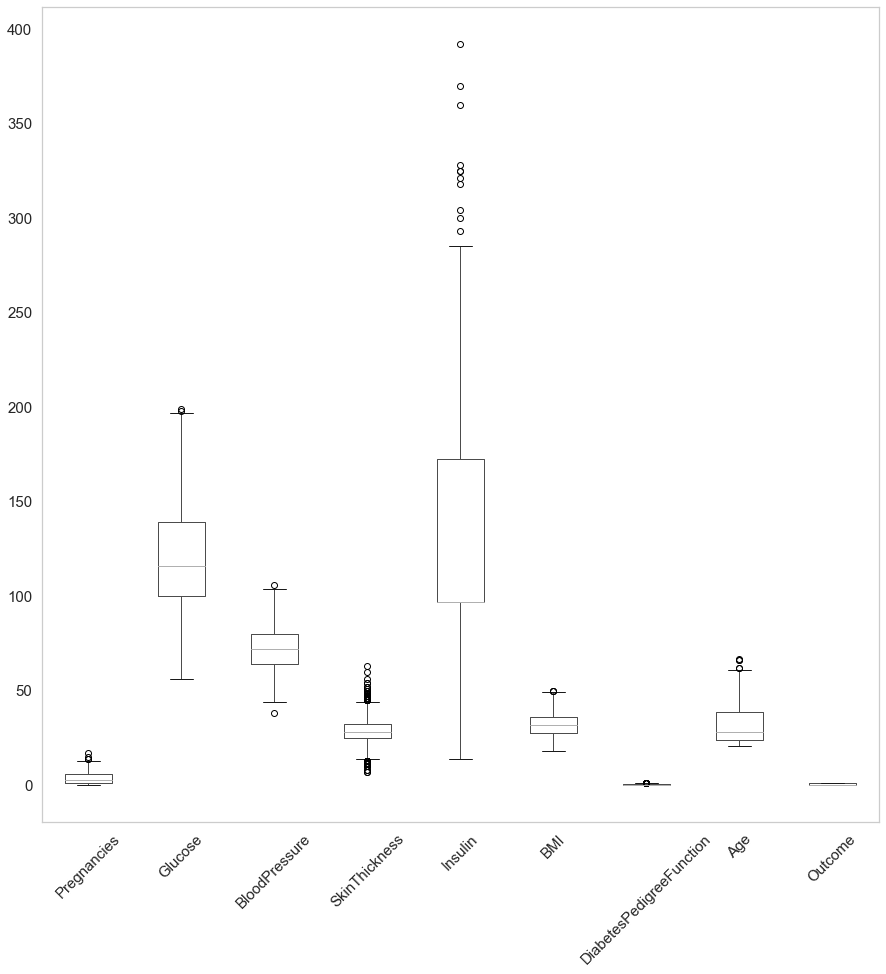

In [71]:
boxplot = data.boxplot(grid=False, rot=45,figsize=(15,15), fontsize=15)   

***
## Section: 3.2 - Did you decide to implement any freature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

If you compare the spread of the Insulin values and DiabetesPedigreeFunction, we see that they are very different. The insulin values ranges from $14$ to $392$, and DiabetesPedigreeFunction value ranges from $0.078$ to $1.394$. 

In statistics, quantile normalization is a technique for making two distributions identical in statistical properties.


Credit for following code: https://medium.com/geekculture/diabetes-prediction-using-machine-learning-python-23fc98125d8

In [72]:
# Data Transformation
from sklearn.preprocessing import QuantileTransformer
q  = QuantileTransformer()
data_X = q.fit_transform(data)
transformedData = q.transform(data_X)
transformedData = pd.DataFrame(data_X)
transformedData.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# Show top 5 rows
transformedData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.489771,0.500049,0.500066,0.500115,0.500374,0.500049,0.500039,0.496741,0.348958
std,0.303224,0.289231,0.288710,0.288174,0.283956,0.289219,0.289228,0.294318,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232725,0.259452,0.227510,0.250978,0.372881,0.248370,0.250978,0.253585,0.000000
50%,0.516297,0.501304,0.498044,0.507823,0.372881,0.494133,0.499348,0.488266,0.000000
75%,0.760756,0.749022,0.771186,0.701434,0.792699,0.751630,0.749837,0.757497,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


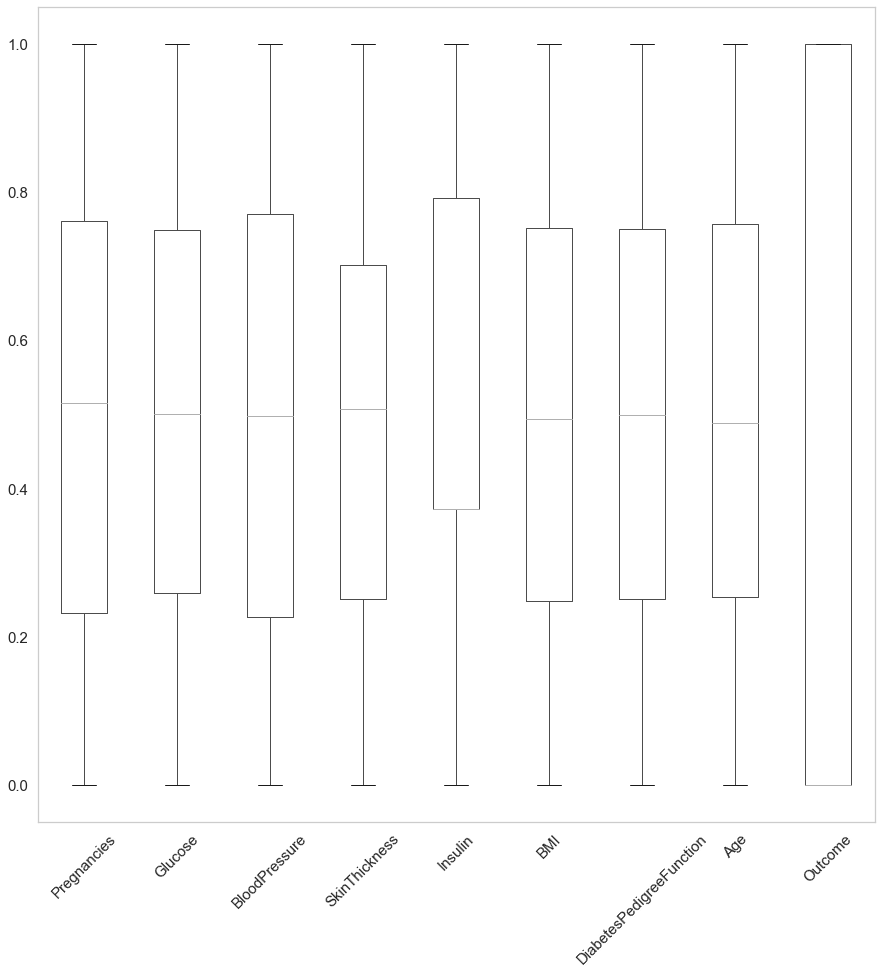

In [73]:
boxplot = transformedData.boxplot(grid=False, rot=45,figsize=(15,15), fontsize=15)   

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

NO

***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***

In [74]:
y_data = data["Outcome"]
X_data = data.drop(["Outcome"], axis=1)

In [75]:
#fitting logistic model
import statsmodels.api as sm
model = sm.Logit(y_data,X_data).fit()

Optimization terminated successfully.
         Current function value: 0.441386
         Iterations 6


In [76]:

np.exp(model.conf_int())

,0,1
Pregnancies,1.041200,1.191649
Glucose,1.003914,1.019260
BloodPressure,0.909578,0.942439
SkinThickness,0.992319,1.050427
Insulin,1.022837,1.033560
BMI,0.916039,0.984546
DiabetesPedigreeFunction,0.997694,4.337734
Age,0.987562,1.033865


In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.3176
Time:                        18:08:45   Log-Likelihood:                -338.98
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.930e-64
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1079      0.034      3.133      0.002       0.040       0.175
Glucose                      0.0115      0.004      2.969      0.003       0.004       0.019
BloodPressure               -0.0770      0.009     -8.508      0.000      -0.095      -0.059
SkinThickness                0.0207      0.015      1.429      0.153      -0.008       0.049
Insulin                      0.0278      0.003     10.447      0.000       0.023       0.033
BMI                         -0.0516      0.018     -2.806      0.005      -0.088      -0.016
DiabetesPedigreeFunction     0.7325      0.375      1.954      0.051      -0.002       1.467
Age                          0.0104      0.012      0.889      0.374      -0.013       0.033
============================================================================================
"""

In [78]:
#Calculating the coefficients of each parameter
model.params

Pregnancies                 0.107856
Glucose                     0.011492
BloodPressure              -0.077029
SkinThickness               0.020743
Insulin                     0.027794
BMI                        -0.051635
DiabetesPedigreeFunction    0.732522
Age                         0.010394
dtype: float64

In [79]:
#Calculating odds ration
#Source: https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int(alpha = 0.05)[0],
        "Upper CI": model.conf_int(alpha=0.05)[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                OR  Lower CI  Upper CI
Pregnancies               1.113887  1.041200  1.191649
Glucose                   1.011558  1.003914  1.019260
BloodPressure             0.925863  0.909578  0.942439
SkinThickness             1.020960  0.992319  1.050427
Insulin                   1.028184  1.022837  1.033560
BMI                       0.949675  0.916039  0.984546
DiabetesPedigreeFunction  2.080320  0.997694  4.337734
Age                       1.010448  0.987562  1.033865



The default confidence level is $ 95\%$, but this can be controlled by setting the alpha parameter, where the confidence level is defined as $ (1-\alpha)\times 100 $

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2938757/

When a logistic regression is calculated, the regression coefficient $ (b1) $ is the estimated increase in the log odds of the outcome per unit increase in the value of the exposure. In other words, the exponential function of the regression coefficient $ (e^{b1}) $ is the odds ratio associated with a one-unit increase in the exposure.

In [80]:
# finding p_i values
pi_data = model.predict(X_data)
preddata_05 = (pi_data > 0.5).astype(int) 
preddata_75 = (pi_data > 0.75).astype(int)

In [81]:
#Source: Class notebooks by Greg

#for pi > 0.5

def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(preddata_05, y_data, cutoff=0.5)

predicted_outcome,0,1
actual_outcome,,
0,441,59
1,73,195


In [82]:
#for pi>0.75

def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(preddata_75, y_data, cutoff=0.75)

predicted_outcome,0,1
actual_outcome,,
0,472,28
1,161,107


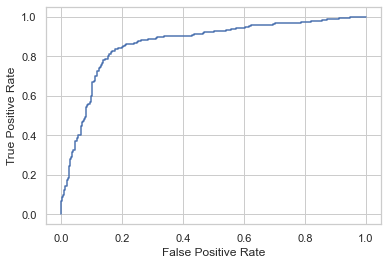

In [83]:
#ROC curve
#Source: https://www.statology.org/plot-roc-curve-python/
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_data,  pi_data)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

In [84]:
#Transformed data

yt_data = transformedData["Outcome"]
Xt_data = transformedData.drop(["Outcome"], axis=1)

#fitting logistic model
import statsmodels.api as sm
transformed_model = sm.Logit(yt_data,Xt_data).fit()

Optimization terminated successfully.
         Current function value: 0.583094
         Iterations 6


In [85]:
np.exp(transformed_model.conf_int())

,0,1
Pregnancies,0.105636,0.369854
Glucose,1.045252,3.865079
BloodPressure,0.115127,0.395340
SkinThickness,0.408113,1.625302
Insulin,9.145656,40.251411
BMI,0.284041,1.112344
DiabetesPedigreeFunction,0.150182,0.424378
Age,1.326861,5.741369


In [86]:
transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                 0.09849
Time:                        18:08:46   Log-Likelihood:                -447.82
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.994e-18
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                 -1.6212      0.320     -5.071      0.000      -2.248      -0.995
Glucose                      0.6981      0.334      2.093      0.036       0.044       1.352
BloodPressure               -1.5449      0.315     -4.909      0.000      -2.162      -0.928
SkinThickness               -0.2053      0.353     -0.582      0.560      -0.896       0.486
Insulin                      2.9542      0.378      7.815      0.000       2.213       3.695
BMI                         -0.5761      0.348     -1.654      0.098      -1.259       0.106
DiabetesPedigreeFunction    -1.3765      0.265     -5.194      0.000      -1.896      -0.857
Age                          1.0153      0.374      2.717      0.007       0.283       1.748
============================================================================================
"""

In [87]:
#Coefficient of transformed data

transformed_model.params

Pregnancies                -1.621203
Glucose                     0.698120
BloodPressure              -1.544865
SkinThickness              -0.205259
Insulin                     2.954212
BMI                        -0.576084
DiabetesPedigreeFunction   -1.376517
Age                         1.015257
dtype: float64

In [88]:
#Calculating odds ratio with confidence interval of 95%
#Source: https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
odds_ratios = pd.DataFrame(
    {
        "OR": transformed_model.params,
        "Lower CI": transformed_model.conf_int(alpha = 0.05)[0],
        "Upper CI": transformed_model.conf_int(alpha=0.05)[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                 OR  Lower CI   Upper CI
Pregnancies                0.197661  0.105636   0.369854
Glucose                    2.009971  1.045252   3.865079
BloodPressure              0.213341  0.115127   0.395340
SkinThickness              0.814437  0.408113   1.625302
Insulin                   19.186599  9.145656  40.251411
BMI                        0.562095  0.284041   1.112344
DiabetesPedigreeFunction   0.252456  0.150182   0.424378
Age                        2.760072  1.326861   5.741369


In [89]:
# finding p_i values
pi_transformed_data = transformed_model.predict(Xt_data)
preddata_t_05 = (pi_transformed_data > 0.5).astype(int)
preddata_t_75 = (pi_transformed_data > 0.75).astype(int)

In [90]:
#Source: Class notebooks by Greg

def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(preddata_t_05, yt_data, cutoff=0.5)

predicted_outcome,0,1
actual_outcome,,
0.0,365,135
1.0,100,168


In [91]:
#Source: Class notebooks by Greg

def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(preddata_t_75, yt_data, cutoff=0.75)

predicted_outcome,0,1
actual_outcome,,
0.0,479,21
1.0,219,49


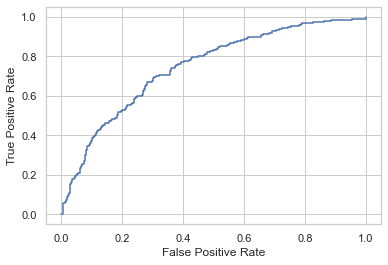

In [92]:
#Source: https://www.statology.org/plot-roc-curve-python/
fpr_t, tpr_t, _ = metrics.roc_curve(yt_data,  pi_transformed_data)

#create ROC curve
plt.plot(fpr_t,tpr_t)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

Looking at the ROC values, the model did better on the original data once we replaced the missing values and outliers as compared to after feature transformation.


The confusion matrix is a summary of prediction results for a given classification problem. The confusion matrix shows the number of correct and incorrect predictions broken down by each class.

For example for the data without feature tranform for $\pi >0.75$, the number of true positives was $472$ and the number of true negatives was $107$. This means we made a total of $479$ correct predictions out of a total of $768$ $(~62\%)$. The confusion matrix also allows us to predict two additional statistics which are good for model evaluation, namely precision and recall.

Breaking the entire data into test data and validation data set will improve the efficiency. I was expecting to have higher accuracy since we are using the same data set to fit the model and predict the outcome.

Categorising the data (additional features) might help to predict the model better. Also rather than quantile transformation, we can use some other transformation to remove the outliers. I am not much familier with other transformation when the data is not Gaussian. I have to look into it.

For future, we can collect more data. And apply different techniques to predict the model with high precision and recall values. 